In [2]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from dataclasses import dataclass

## Helper

### Enemies

In [3]:
@dataclass
class Creature:
    hp: int
    armor: tuple[int, int]
    accuracy: int
    evasion: int
    damage: tuple[int, int]
    name: str
    attack_speed: float = 1.0

class Creatures:
    rat = Creature(8,(0,1), 8, 2, (1,4), "rat")
    snake = Creature(4,(0,0), 10, 25, (1,4), "snake")
    gnoll = Creature(12,(0,2), 10, 4, (1,6), "gnoll")
    crab = Creature(15,(0,4), 12, 5, (1,7), "crab")
    slime = Creature(20,(0,0), 12, 5, (2,5), "slime")
    flies = Creature(50,(0,0), 10, 5, (1,4), "swarm of flies")
    skeleton = Creature(25,(0,5), 12, 9, (2,10), "skeleton")
    thief = Creature(20,(0,3), 12, 12, (1,10), "crazy thief", attack_speed=0.5)
    necromancer = Creature(40,(0,5), 12, 14, (2,10), "necromancer")
    guard = Creature(40,(0,7), 12, 10, (4,12), "guard")
    dm100 = Creature(20,(0,4), 11, 8, (2,8), "DM100")
    bat = Creature(30,(0,4), 16, 15, (5,18), "vampire bat")
    brute = Creature(40,(0,8), 20, 15, (5,25), "gnoll brute")
    shaman = Creature(35,(0,6), 18, 15, (5,10), "gnoll shaman")
    spider = Creature(50,(0,6), 20, 14, (10,20), "cave spider")
    dm200 = Creature(80,(0,8), 25, 8, (10,25), "DM200")
    ghoul = Creature(45,(0,4), 24, 20, (16,22),"dwarven ghoul")
    elemental = Creature(65,(0,5), 25, 20, (20,25), "elemental")
    warlock = Creature(70,(0,8), 25, 18, (16,22), "dwarf warlock")
    monk = Creature(68,(0,2), 30, 30, (12,25), "dwarf monk", attack_speed=0.5)
    golem = Creature(120,(0,12), 28, 15, (25,30), "golem")
    succubus = Creature(80,(0,10), 40, 25, (25,30), "succubus")
    eye = Creature(100,(0,10), 30, 20, (20,30), "evil eye")
    scorpio = Creature(110,(0,16), 36, 24, (30,40), "scorpio")
    demon = Creature(60,(0,4), 30, 22, (15,25), "demon ripper", attack_speed=0.5)
    goo = Creature(120,(0,2), 10, 8, (1,8), "Goo")
    goo_enraged = Creature(120,(0,2), 15, 8 * 1.5, (1,12), "Goo (enraged)")
    tengu = Creature(250,(0,5), 20, 15, (6,12), "Tengu")
    dm300 = Creature(400,(0,10), 20, 15, (15,25), "DM300")
    dk = Creature(450,(0,10), 26, 22, (15,25), "Dwarf King")
    fist = Creature(300,(0,15), 36, 20, (18,36), "Yog Fist")


### Equipment

In [4]:
from dataclasses import dataclass

class ArmorAugment:
    NONE = (0, 0)
    DEFENSE = (-2, 1)
    EVASION = (2, -1)

class WeaponAugment:
    SPEED = (0.7, 2/3)
    DAMAGE = (1.5, 5/3)
    NONE = (1, 1)

@dataclass
class Armor():
    base_defense: tuple[int, int]
    defense_scaling: tuple[int, int]
    strength: int
    name: str

@dataclass
class ArmorInstance:
    armor: Armor
    upgrade: int
    augment: ArmorAugment

    def _get_augment_phrase(self):
        armor_augment_phrase = ""
        if self.augment == ArmorAugment.DEFENSE:
            armor_augment_phrase = " (defense)"
        elif self.augment == ArmorAugment.EVASION:
            armor_augment_phrase = " (evasion)"
        return armor_augment_phrase

    def get_name_and_aug(self):
        return f'{self.armor.name}{self._get_augment_phrase()}'

    def get_full_name(self):
        
        return f'+{self.upgrade} {self.get_name_and_aug()}'


# base damage of armor
class Armors:
    cloth = Armor((0, 2), (0, 1), 10, "cloth armor")
    leather = Armor((0, 3), (0, 1), 12, "leather armor")
    mail = Armor((0, 4), (0, 1), 14, "mail armor")
    scale = Armor((0, 5), (0, 1), 16, "scale armor")
    plate = Armor((0, 6), (0, 1), 18, "plate armor")

@dataclass
class Weapon:
    base_damage: tuple[int, int]
    damage_scaling: tuple[int, int]
    strength: int
    name: str
    accuracy_multiplier: float = 1
    delay: float = 1
    defense: tuple[int, int] = (0, 0)
    defense_scaling: tuple[int, int] = (0, 0)

@dataclass
class WeaponInstance:
    weapon: Weapon
    upgrade: int = 0
    augment: WeaponAugment = WeaponAugment.NONE

    def _get_augment_phrase(self):
        weapon_augment_phrase = ""
        if self.augment == WeaponAugment.DAMAGE:
            weapon_augment_phrase = " (damage)"
        elif self.augment == WeaponAugment.SPEED:
            weapon_augment_phrase = " (speed)"
        return weapon_augment_phrase

    def get_name_and_aug(self):
        return f'{self.weapon.name}{self._get_augment_phrase()}'

    def get_full_name(self):
        return f'+{self.upgrade} {self.get_name_and_aug()}'
    

class Weapons:
    worn_shortsword = Weapon((1,10), (1,2), 10, 'worn shortsword')
    dagger = Weapon((1,8), (1,2), 10,  'dagger')
    studded_gloves = Weapon((1,5), (1,1), 10,  'studded gloves', delay=0.5)
    rapier = Weapon((1,8), (1,2), 10,  'rapier', defense=(0,1))
    cudgel = Weapon((1,8), (1,2), 10,  'cudgel', accuracy_multiplier=1.4)
    staff = Weapon((1,6), (1,2), 10,  "mage's staff")
    shortsword = Weapon((2,15), (1,3), 12, 'shortsword')
    handaxe = Weapon((2,12), (1,3), 12, 'hand axe', accuracy_multiplier=1.32)
    spear = Weapon((2,20), (1,4), 12, 'spear', delay=1.5)
    dirk = Weapon((2,12), (1,3), 12, 'dirk')
    quarterstaff = Weapon((2,12), (1,3), 12, 'quarterstaff', defense=(0, 2))
    sickle = Weapon((2,20), (1,3), 12, 'sickle', accuracy_multiplier=0.68)
    pickaxe = Weapon((2,15), (1,3), 14, 'pickaxe')
    sword = Weapon((3,20), (1,4), 14, 'sword')
    mace = Weapon((3,16), (1,4), 14, 'mace', accuracy_multiplier=1.28)
    scimitar = Weapon((3,16), (1,4), 14, 'scimitar', delay=0.8)
    sai = Weapon((3,10), (1,2), 14, 'sai', delay=0.5)
    round_shield = Weapon((3,12), (1,2), 14, 'round shield', defense=(0,4), defense_scaling=(0,1))
    whip = Weapon((3,15), (1,3), 14, 'whip')
    longsword = Weapon((4,25), (1,5), 16, 'longsword')
    battleaxe = Weapon((4,20), (1,5), 16, 'battleaxe', accuracy_multiplier=1.24)
    flail = Weapon((4,35), (1,8), 16, 'flail', accuracy_multiplier=0.8)
    assassins_blade = Weapon((4,20), (1,5), 16, "assassin's blade")
    runic_blade = Weapon((4,20), (1,6), 16, 'runic blade')
    crossbow = Weapon((4,20), (1,4), 16, 'crossbow')
    katana = Weapon((4,20), (1,5), 16, 'katana', defense=(0, 3))
    greatsword = Weapon((5,30), (1,6), 18, 'greatsword')
    warhammer = Weapon((5,24), (1,6), 18, 'war hammer', accuracy_multiplier=1.2)
    glaive = Weapon((5,40), (1,8), 18, 'glaive',delay=1.5)
    greataxe = Weapon((5,45), (1,6), 20, 'great axe')
    greatshield = Weapon((5,18), (1,3), 18, 'greatshield', defense=(0,6), defense_scaling=(0, 2))
    stone_gauntlet = Weapon((5,15), (1,3), 18, 'stone gauntlet', delay=0.5)
    war_scythe = Weapon((5,40), (1,6), 18, 'war scythe', accuracy_multiplier=0.8)


### Helper functions

In [5]:
def calc_hit_rate(accuracy, evasion):
    if evasion >= accuracy:
        return accuracy / (2 * evasion)
    else:
        return 1 - evasion / (2 * accuracy)

def calc_percent_change(original, new):
    return (new - original)/original * 100

def calc_final_damage(damage, defense):
    return max(0, damage - defense)

def calc_strength_reduction(upgrade):
    return math.floor((1/2)*(-1 + math.sqrt(1 + 8 * upgrade)))

def calc_defense_interval_fima(base_armor, armor_level, armor_augment):
    base_armor_max = base_armor[1]
    max_defense = base_armor_max + armor_level + armor_augment[1] * (armor_level + 2)
    return (base_armor[0], max_defense)

def calc_weapon_defense(weapon: WeaponInstance):
    return np.array(weapon.weapon.defense) + weapon.upgrade * np.array(weapon.weapon.defense_scaling)

def calc_final_evasion(base_evasion, armor_level, armor_augment, evasion_multiplier):
    return base_evasion * evasion_multiplier + armor_augment[0] * (armor_level + 2)

def calc_damage_interval(weapon: WeaponInstance):
    damage_interval = np.array(weapon.weapon.base_damage)
    damage_scaling = np.array(weapon.weapon.damage_scaling)
    upgrade_level = weapon.upgrade
    augment_factor = weapon.augment[0]
    return np.round((damage_interval + damage_scaling * upgrade_level) * augment_factor)

def triangular_discrete(low, high):
    # min + (int)((Float() + Float()) * (max - min + 1) / 2f);
    u1 = random.uniform(0,1)
    u2 = random.uniform(0,1)
    return low + math.floor((u1 + u2) * (high - low + 1) / 2)

def roll_ranges(ranges):
    return sum(max(0, triangular_discrete(x[0], x[1])) for x in ranges)

def roll_damage_taken(defense_intervals, damage_intervals, hit_chance):
    defense_roll = roll_ranges(defense_intervals)
    damage_roll = roll_ranges(damage_intervals)
    evasion_roll = 1 if random.uniform(0, 1) < hit_chance else 0
    return evasion_roll * calc_final_damage(damage_roll, defense_roll)

def roll_skeleton_explosion_damage_taken(defense_intervals):
    defense_roll = roll_ranges(defense_intervals) + roll_ranges(defense_intervals)
    damage_roll = roll_ranges([(6,12)])
    return calc_final_damage(damage_roll, defense_roll)

def simulate_damage(defense_intervals, damage_intervals, hit_chance, num_iterations):
    data_points = []
    for _ in range(num_iterations):
        damage = roll_damage_taken(defense_intervals, damage_intervals, hit_chance)
        data_points.append(damage)
    return data_points


## Compare armor augmentations

In [6]:
###########################Config variables###########################
creature = Creatures.succubus
armor = Armors.plate
armor_level = 3
hero_level = 23
evasion_multiplier = 1
num_simulations = 100000
extra_defenses = []
######################################################################

armor_unaug = ArmorInstance(armor, armor_level, ArmorAugment.NONE)
armor_defense = ArmorInstance(armor, armor_level, ArmorAugment.DEFENSE)
armor_evasion = ArmorInstance(armor, armor_level, ArmorAugment.EVASION)

def simulate_damage_taken(accuracy, damage_interval, armor, hero_level, evasion_multiplier, num_simulations, extra_defenses):
    base_armor = armor.armor.base_defense
    augmentation = armor.augment
    armor_level = armor.upgrade
    base_evasion = hero_level + 4
    final_evasion = calc_final_evasion(base_evasion, armor_level, augmentation, evasion_multiplier)
    final_defense_interval = calc_defense_interval_fima(base_armor, armor_level, augmentation)
    hit_chance = calc_hit_rate(accuracy, final_evasion)
    data = simulate_damage([final_defense_interval] + extra_defenses, [damage_interval], hit_chance, num_simulations)
    return data

accuracy = creature.accuracy
damage_interval = creature.damage

data_unaug = simulate_damage_taken(accuracy, damage_interval, armor_unaug, hero_level, evasion_multiplier, num_simulations, extra_defenses)
data_defense = simulate_damage_taken(accuracy, damage_interval, armor_defense, hero_level, evasion_multiplier, num_simulations, extra_defenses)
data_evasion = simulate_damage_taken(accuracy, damage_interval, armor_evasion, hero_level, evasion_multiplier, num_simulations, extra_defenses)

avg_damage_unaug = np.average(data_unaug)
avg_damage_defense = np.average(data_defense)
avg_damage_evasion = np.average(data_evasion)

var_damage_unaug = np.var(data_unaug)
var_damage_defense = np.var(data_defense)
var_damage_evasion = np.var(data_evasion)

percent_change_defense = calc_percent_change(avg_damage_unaug, avg_damage_defense)
percent_change_evasion = calc_percent_change(avg_damage_unaug, avg_damage_evasion)

print(f"Average damage unaugmented {avg_damage_unaug}")
print(f"Average damage defense {avg_damage_defense}")
print(f"Average damage evasion {avg_damage_evasion}")
print(f"Variance damage unaugmented {var_damage_unaug}")
print(f"Variance damage defense {var_damage_defense}")
print(f"Variance damage evasion {var_damage_evasion}")
print(f"Defense augment percent change: {percent_change_defense}")
print(f"Evasion augment percent change: {percent_change_evasion}")

Average damage unaugmented 15.26281
Average damage defense 16.10941
Average damage evasion 13.66503
Variance damage unaugmented 122.07938090389999
Variance damage defense 79.35723945190003
Variance damage evasion 163.00330509909998
Defense augment percent change: 5.546816084325235
Evasion augment percent change: -10.468452401621983


## Compare armors

In [7]:
###########################Config variables###########################
creature = Creatures.tengu
armor1 = ArmorInstance(Armors.leather, 1, ArmorAugment.DEFENSE)
armor2 = ArmorInstance(Armors.scale, 1, ArmorAugment.NONE)
hero_level = 12
evasion_multiplier = 1
num_simulations = 100000
extra_defenses = []
######################################################################

data1 = simulate_damage_taken(accuracy, damage_interval, armor1, hero_level, evasion_multiplier, num_simulations, extra_defenses)
data2 = simulate_damage_taken(accuracy, damage_interval, armor2, hero_level, evasion_multiplier, num_simulations, extra_defenses)

avg_damage1 = np.average(data1)
avg_damage2 = np.average(data2)

print(f"Average damage of armor 1: {avg_damage1}")
print(f"Average damage of armor 2: {avg_damage2}")
print(f"Armor {1 if avg_damage1 < avg_damage2 else 2} is better")

Average damage of armor 1: 20.97889
Average damage of armor 2: 19.60306
Armor 2 is better


## Compare Evasion


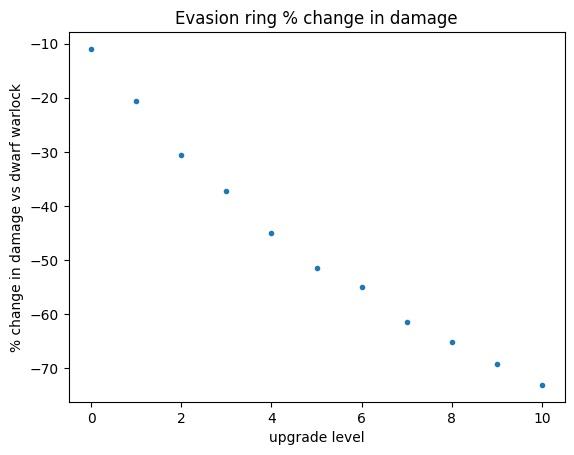

In [8]:
###########################Config variables###########################
creature = Creatures.warlock
armor1 = ArmorInstance(Armors.scale, 1, ArmorAugment.NONE)
hero_level = 18
total_levels=  10
num_simulations = 10000
extra_defenses = []
######################################################################

data = []
for i in range(-1, total_levels + 1):
    evasion_multiplier = 1.125 ** (1 + i)
    turns_data_points = simulate_damage_taken(creature.accuracy, creature.damage, armor1, hero_level, evasion_multiplier, num_simulations, extra_defenses)
    data.append(turns_data_points)

no_evasion_data = data[0]
evasion_data = data[1:]

no_evasion_avg = np.average(no_evasion_data)
evasion_avg = [np.average(x) for x in evasion_data]

evasion_improvement = [calc_percent_change(no_evasion_avg, x) for x in evasion_avg]

plt.title(f'Evasion ring % change in damage')
plt.xlabel('upgrade level')
plt.ylabel(f'% change in damage vs {creature.name}')
plt.plot(range(total_levels + 1), evasion_improvement, '.')



## Accuracy Ring comparison

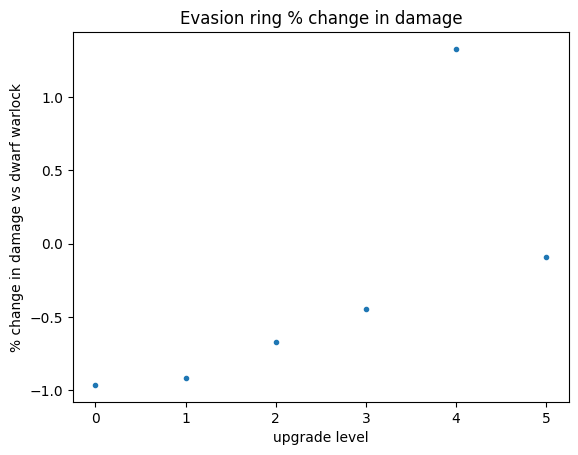

In [9]:
###########################Config variables###########################
creature = Creatures.warlock
armor1 = ArmorInstance(Armors.scale, 1, ArmorAugment.NONE)
hero_level = 18
total_levels=  5
num_simulations = 10000
extra_defenses = []
######################################################################

data = []
for i in range(-1, total_levels + 1):
    turns_data_points = simulate_damage_taken(accuracy, damage_interval, armor1, hero_level, 1, num_simulations, extra_defenses)
    data.append(turns_data_points)

no_evasion_data = data[0]
evasion_data = data[1:]

no_evasion_avg = np.average(no_evasion_data)
evasion_avg = [np.average(x) for x in evasion_data]

evasion_improvement = [calc_percent_change(no_evasion_avg, x) for x in evasion_avg]

plt.title(f'Evasion ring % change in damage')
plt.xlabel('upgrade level')
plt.ylabel(f'% change in damage vs {creature.name}')
plt.plot(range(total_levels + 1), evasion_improvement, '.')



## Plot defense damage reduction

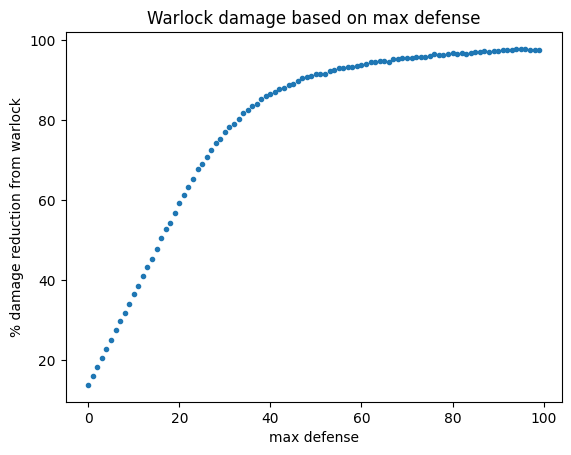

In [10]:
###########################Config variables###########################
damage_interval = Creatures.warlock.damage
num_simulations= 10000
num_plots = 100
bonus_defense = (0, 0)
######################################################################

average_damage = []

for max_defense in range(num_plots):
    turns_data_points = simulate_damage([(0, max_defense), bonus_defense], [damage_interval], 1.0, num_simulations)
    average_damage.append(-calc_percent_change(damage_interval[1], np.average(turns_data_points)))

plt.title("Warlock damage based on max defense")
plt.xlabel("max defense")
plt.ylabel("% damage reduction from warlock")
plt.plot(range(num_plots), average_damage, '.')

## Clover simulations

### Helper Functions

In [11]:
def calc_clover_proc_chance(level):
    return 0.25 * (level + 1)

def get_clover_damage(damage_ranges, clover_level):
    normal_damage = roll_ranges(damage_ranges)
    min_damage = sum([x[0] for x in damage_ranges])
    max_damage = sum([x[1] for x in damage_ranges])
    proc_chance = calc_clover_proc_chance(clover_level)
    return random.choices([normal_damage, min_damage, max_damage], weights=[1-proc_chance, 2/5 * proc_chance, 3/5 * proc_chance])[0]

def simulate_fight(hp, defense_range, damage_range, extra_strength, clover_level, ignore_defense):
    curr_hp = hp
    num_hits = 0
    while(curr_hp > 0):
        damage_roll = get_clover_damage((damage_range, (0, extra_strength)), clover_level)
        (defense_low, defense_high) = defense_range
        defense_roll = 0 if ignore_defense else triangular_discrete(defense_low, defense_high)
        curr_hp -= calc_final_damage(damage_roll, defense_roll)
        num_hits += 1
    return num_hits

def simulate_n_fights(hp, defense_range, damage_range, extra_strength, clover_level, ignore_defense, num_simulations):
    result = []
    for _ in range(num_simulations):
        num_hits = simulate_fight(hp, defense_range, damage_range, extra_strength, clover_level, ignore_defense)
        result.append(num_hits)
    return result

def simulate_clover_efficacy(enemy, damage_range, extra_strength, num_simulations, ignore_defense):
    data_points_clover0 = simulate_n_fights(enemy.hp, enemy.armor, damage_range, extra_strength, 0, ignore_defense, num_simulations)
    data_points_clover1 = simulate_n_fights(enemy.hp, enemy.armor, damage_range, extra_strength, 1, ignore_defense, num_simulations)
    data_points_clover2 = simulate_n_fights(enemy.hp, enemy.armor, damage_range, extra_strength, 2, ignore_defense, num_simulations)
    data_points_clover3 = simulate_n_fights(enemy.hp, enemy.armor, damage_range, extra_strength, 3, ignore_defense, num_simulations)
    data_points_normal = simulate_n_fights(enemy.hp, enemy.armor, damage_range, extra_strength, -1, ignore_defense, num_simulations)

    avg_normal = np.average(data_points_normal)
    avg0 = np.average(data_points_clover0)
    avg1 = np.average(data_points_clover1)
    avg2 = np.average(data_points_clover2)
    avg3 = np.average(data_points_clover3)

    var_normal = np.var(data_points_normal)
    var0 = np.var(data_points_clover0)
    var1 = np.var(data_points_clover1)
    var2 = np.var(data_points_clover2)
    var3 = np.var(data_points_clover3)
    
    
    print(f'Num simulations: {num_simulations}')
    print('Average number of hits')
    print(f'Normal {avg_normal}')
    print(f'Clover +0 {avg0}')
    print(f'Clover +1 {avg1}')
    print(f'Clover +2 {avg2}')
    print(f'Clover +3 {avg3}')
    print(f'Variance:')
    print(f'Normal {var_normal}')
    print(f'Clover +0 {var0}')
    print(f'Clover +1 {var1}')
    print(f'Clover +2 {var2}')
    print(f'Clover +3 {var3}')
    print(f'% change:')
    print(f'Clover +0 {calc_percent_change(avg_normal, avg0)}')
    print(f'Clover +1 {calc_percent_change(avg_normal, avg1)}')
    print(f'Clover +2 {calc_percent_change(avg_normal, avg2)}')
    print(f'Clover +3 {calc_percent_change(avg_normal, avg3)}')
    

### Simulate clover efficacy

In [12]:
###########################Config variables###########################
weapon = WeaponInstance(Weapons.shortsword, 1, WeaponAugment.NONE)
damage_range = calc_damage_interval(weapon)
extra_strength = 3
enemy = Creatures.tengu
num_simulations = 10000
ignore_defense = False
#######################################################################
simulate_clover_efficacy(enemy, damage_range, extra_strength, num_simulations, False)

Num simulations: 10000
Average number of hits
Normal 26.8083
Clover +0 25.7125
Clover +1 24.5732
Clover +2 23.5843
Clover +3 22.6653
Variance:
Normal 3.85315111
Clover +0 7.73744375
Clover +1 10.308241760000001
Clover +2 11.98409351
Clover +3 13.068275909999999
% change:
Clover +0 -4.087540052894069
Clover +1 -8.337343285475018
Clover +2 -12.02612623702361
Clover +3 -15.454169044661544


### Clover Average improvement and Variance based on upgrade level

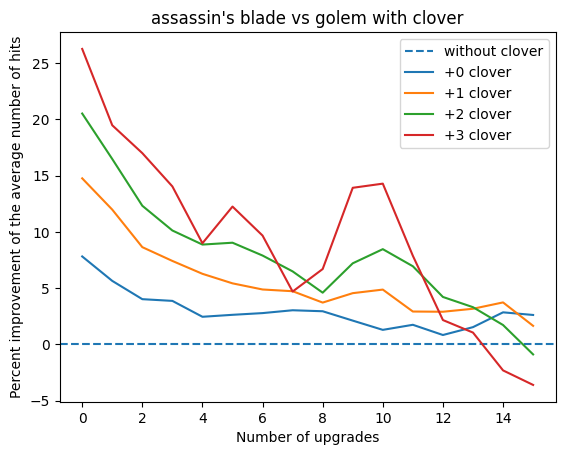

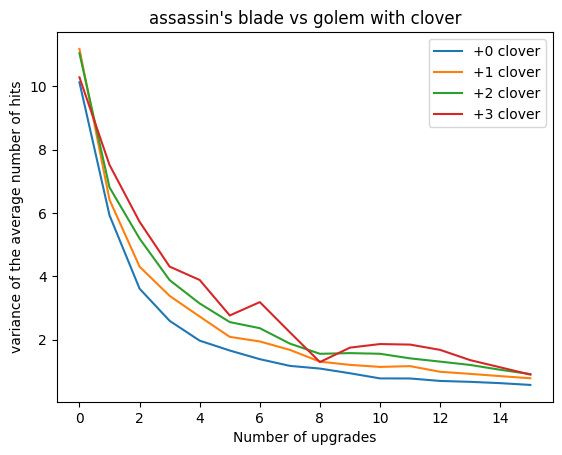

In [13]:
###########################Config variables###########################
enemy = Creatures.golem
weapon = WeaponInstance(Weapons.assassins_blade, 0, WeaponAugment.NONE)
num_simulations = 2000
num_upgrades = 15
ignore_defense = False
#######################################################################

averages_clover0 = []
averages_clover1 = []
averages_clover2 = []
averages_clover3 = []
vars_clover0 = []
vars_clover1 = []
vars_clover2 = []
vars_clover3 = []

for i in range(num_upgrades + 1):
    weapon.upgrade = i
    damage_range = calc_damage_interval(weapon)

    data_points_clover0 = simulate_n_fights(enemy.hp, enemy.armor, damage_range, 0, 0, ignore_defense, num_simulations)
    data_points_clover1 = simulate_n_fights(enemy.hp, enemy.armor, damage_range, 0, 1, ignore_defense, num_simulations)
    data_points_clover2 = simulate_n_fights(enemy.hp, enemy.armor, damage_range, 0, 2, ignore_defense, num_simulations)
    data_points_clover3 = simulate_n_fights(enemy.hp, enemy.armor, damage_range, 0, 3, ignore_defense, num_simulations)
    data_points_normal = simulate_n_fights(enemy.hp, enemy.armor, damage_range, 0, -1, ignore_defense, num_simulations)

    average_clover0 = np.average(data_points_clover0)
    average_clover1 = np.average(data_points_clover1)
    average_clover2 = np.average(data_points_clover2)
    average_clover3 = np.average(data_points_clover3)
    average_normal = np.average(data_points_normal)

    var_clover0 = np.var(data_points_clover0)
    var_clover1 = np.var(data_points_clover1)
    var_clover2 = np.var(data_points_clover2)
    var_clover3 = np.var(data_points_clover3)
    var_normal = np.var(data_points_normal)

    averages_clover0.append(-calc_percent_change(average_normal, average_clover0))
    averages_clover1.append(-calc_percent_change(average_normal, average_clover1))
    averages_clover2.append(-calc_percent_change(average_normal, average_clover2))
    averages_clover3.append(-calc_percent_change(average_normal, average_clover3))

    vars_clover0.append(var_clover0)
    vars_clover1.append(var_clover1)
    vars_clover2.append(var_clover2)
    vars_clover3.append(var_clover3)

augment_text = ''
if(weapon.augment == WeaponAugment.DAMAGE):
    augment_text = ' (damage)'
elif(weapon.augment == WeaponAugment.SPEED):
    augment_text = ' (speed)'

plt.title(f"{weapon.weapon.name}{augment_text} vs {enemy.name} with clover")
plt.xlabel("Number of upgrades")
plt.ylabel("Percent improvement of the average number of hits")
plt.axhline(y=0, linestyle='--', label='without clover')
plt.plot(range(num_upgrades + 1), averages_clover0, label='+0 clover')
plt.plot(range(num_upgrades + 1), averages_clover1, label='+1 clover')
plt.plot(range(num_upgrades + 1), averages_clover2, label='+2 clover')
plt.plot(range(num_upgrades + 1), averages_clover3, label='+3 clover')
plt.legend()
plt.show()

plt.title(f"{weapon.weapon.name}{augment_text} vs {enemy.name} with clover")
plt.xlabel("Number of upgrades")
plt.ylabel("variance of the average number of hits")

plt.plot(range(num_upgrades + 1), vars_clover0, label='+0 clover')
plt.plot(range(num_upgrades + 1), vars_clover1, label='+1 clover')
plt.plot(range(num_upgrades + 1), vars_clover2, label='+2 clover')
plt.plot(range(num_upgrades + 1), vars_clover3, label='+3 clover')
plt.legend()
plt.show()




## Equipment upgrade comparisons

In [ ]:

t1 = [
    WeaponInstance(Weapons.worn_shortsword),
    WeaponInstance(Weapons.staff),
    WeaponInstance(Weapons.studded_gloves),
    WeaponInstance(Weapons.rapier),
    WeaponInstance(Weapons.cudgel),
]

t2 = [
    WeaponInstance(Weapons.sickle),
    WeaponInstance(Weapons.shortsword),
    WeaponInstance(Weapons.handaxe),
    WeaponInstance(Weapons.quarterstaff),
    WeaponInstance(Weapons.spear)
]

t3 = [WeaponInstance(Weapons.sword),
    WeaponInstance(Weapons.mace),
    WeaponInstance(Weapons.scimitar),
    WeaponInstance(Weapons.sai),
    WeaponInstance(Weapons.round_shield),
    WeaponInstance(Weapons.whip)
]

t4 = [
    WeaponInstance(Weapons.longsword),
    WeaponInstance(Weapons.battleaxe),
    WeaponInstance(Weapons.runic_blade),
    WeaponInstance(Weapons.crossbow),
    WeaponInstance(Weapons.katana),
    WeaponInstance(Weapons.flail),
]

t5 = [
    WeaponInstance(Weapons.greatsword),
    WeaponInstance(Weapons.warhammer),
    WeaponInstance(Weapons.glaive),
    WeaponInstance(Weapons.greatshield),
    WeaponInstance(Weapons.stone_gauntlet),
    WeaponInstance(Weapons.war_scythe)
]

class Hero:
    level: int
    strength: int
    armor: ArmorInstance
    weapon: WeaponInstance
    turn: float
    damage_taken: int

    def __init__(self, level: int, strength: int, armor: ArmorInstance, weapon: WeaponInstance):
        self.level = level
        self.strength = strength
        self.armor = armor
        self.weapon = weapon
        self.turn = 0.0
        self.damage_taken = 0
        
    def _get_strength_surplus(self):
        return self.strength - self.weapon.weapon.strength + calc_strength_reduction(self.weapon.upgrade)
    
    def get_ht(self):
        return self.level * 5 + 15
    
    def get_strength_bonus(self):
        return max(self._get_strength_surplus(), 0)
    
    def get_encumberment(self):
        return max(-self._get_strength_surplus(), 0)
    
    def get_accuracy(self):
        base_accuracy = self.level + 9
        return base_accuracy * self.weapon.weapon.accuracy_multiplier

    def get_evasion(self):
        base_evasion = self.level + 4
        return calc_final_evasion(base_evasion, self.armor.upgrade, self.armor.augment, 1)
    
    def get_attack_speed(self):
        return (self.weapon.augment[1] * self.weapon.weapon.delay) * (1.2 ** self.get_encumberment())
    
    def get_defense_intervals(self):
        return [calc_defense_interval_fima(self.armor.armor.base_defense, self.armor.upgrade, self.armor.augment),
                            calc_weapon_defense(self.weapon) - self.get_encumberment()]


class CreatureInstance:
    creature: Creature
    damage_taken: int
    turn: float
    def __init__(self, creature: Creature):
        self.creature = creature
        self.damage_taken = 0
        self.turn = 0

def get_hero_accuracy(hero: Hero):
    return hero.level + 9

def get_hero_evasion(hero: Hero):
    return hero.level + 4

def get_hero_max_hp(hero: Hero):
    return hero.level * 5 + 15

def hero_attacks_enemy(hero: Hero, enemy: CreatureInstance, is_surprise: bool):
    hit_rate = 1 if is_surprise else calc_hit_rate(hero.get_accuracy() , enemy.creature.evasion)
    damage = roll_damage_taken(
        [enemy.creature.armor],
        [
            calc_damage_interval(hero.weapon),
            (0, hero.get_strength_bonus())
        ],
        hit_rate / (1.5 ** hero.get_encumberment()))
    # damage reduction for slimes
    if enemy.creature is Creatures.slime and damage >= 5:
        damage = 4 + int(math.sqrt(8*(damage - 4) + 1) - 1)/2
    enemy.damage_taken += damage
    hero.turn += hero.get_attack_speed()

def enemy_attacks_hero(hero: Hero, enemy: CreatureInstance):
    damage_taken = roll_damage_taken(
            hero.get_defense_intervals(),
            [enemy.creature.damage],
            calc_hit_rate(enemy.creature.accuracy, hero.get_evasion()))
    hero.damage_taken += damage_taken
    if enemy.creature is Creatures.bat:
        healing = min(enemy.damage_taken, damage_taken - 4)
        enemy.damage_taken -= healing
    enemy.turn += enemy.creature.attack_speed

def simulate_encounter2(hero: Hero,
                       enemy: CreatureInstance,
                       ignore_enemy_evasion: bool = False,
                       hero_first: bool = True
                       ):
    hp_threshold = 1000
    if not hero_first:
        # set the enemy turn back 1 turn so it has 1 extra whole turn. Assumes last action the hero did took 1 whole turn
        enemy.turn -= 1
    
    while enemy.damage_taken < enemy.creature.hp and hero.damage_taken < hp_threshold:
        # check the turn. Prioritize the hero if equal
        if hero.turn <= enemy.turn:
            hero_attacks_enemy(hero, enemy, ignore_enemy_evasion)
        else:
            enemy_attacks_hero(hero, enemy)
    
    if enemy is Creatures.skeleton:
        hero.damage_taken += roll_skeleton_explosion_damage_taken(hero.get_defense_intervals())
    
def reset_hero(hero: Hero):
    hero.damage_taken = 0
    hero.turn = hero.turn % -1

def simulate_n_encounters2(hero: Hero, enemy: Creature, num_simulations: int, ignore_enemy_evasion: bool = False, hero_first: bool = True):
    turns_data_points = []
    damage_taken_data_points = []
    for _ in range(num_simulations):
        extra_turn = hero.turn
        enemy_instance = CreatureInstance(enemy)
        simulate_encounter2(hero, enemy_instance, ignore_enemy_evasion, hero_first)
        # we subtract extra turn to cancel out the extra turn we got from a previous fight so it doesn't get counted twice
        turns_data_points.append(hero.turn - extra_turn)
        damage_taken_data_points.append(hero.damage_taken)
        reset_hero(hero)
    return (turns_data_points, damage_taken_data_points)

### Weapon comparisons

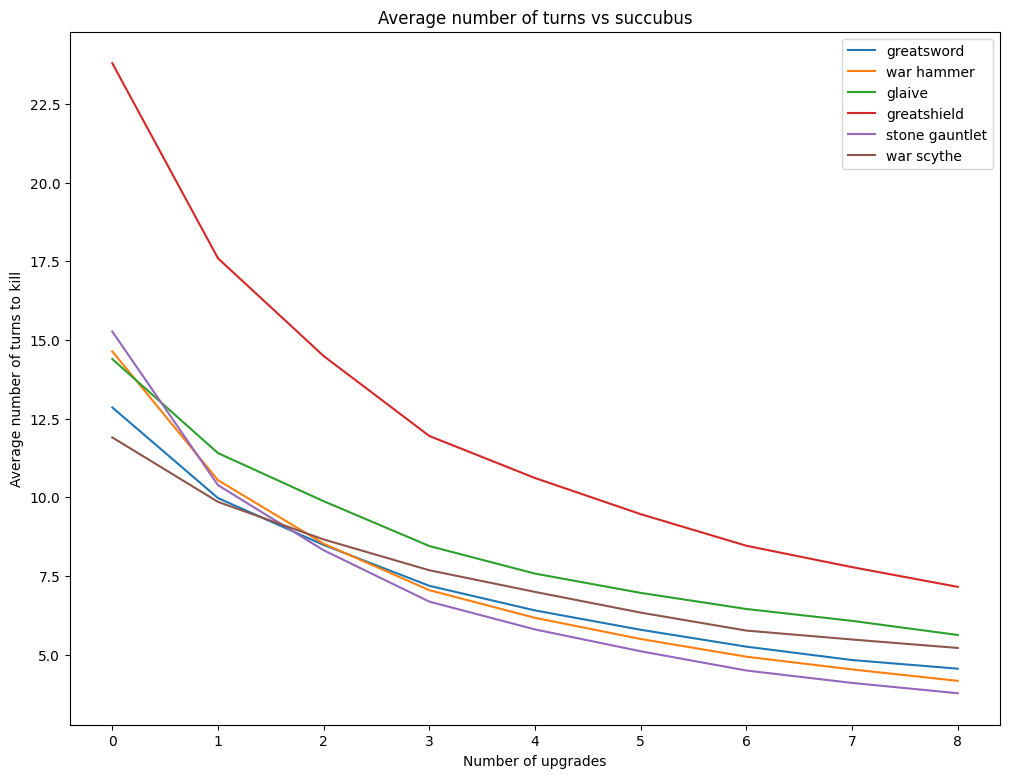

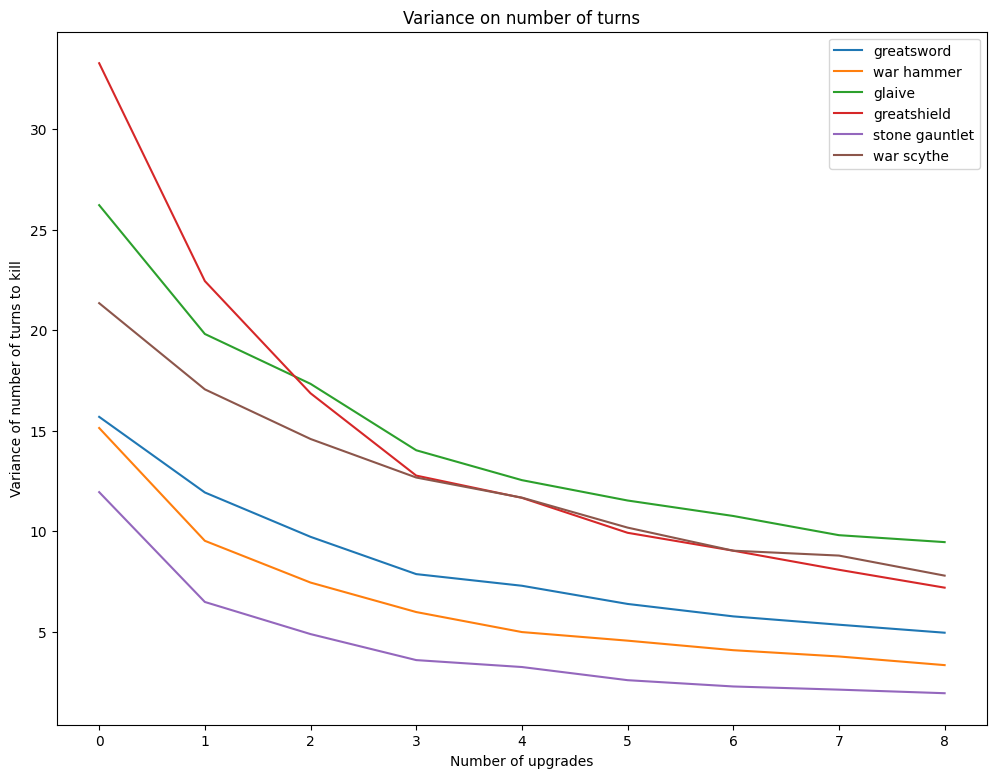

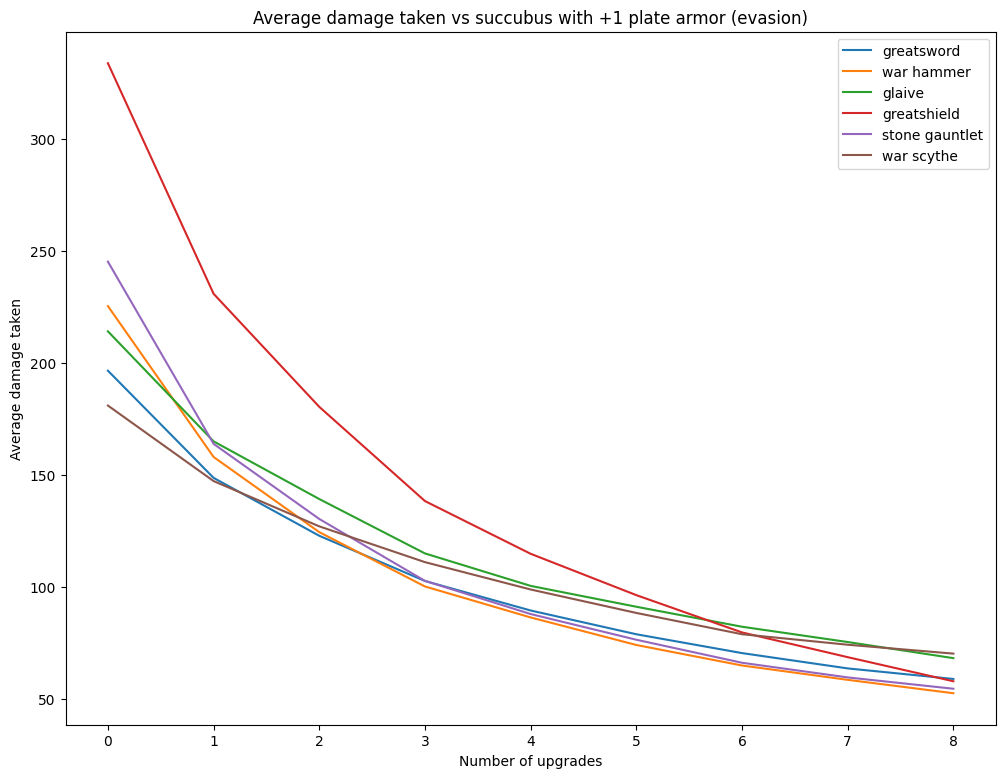

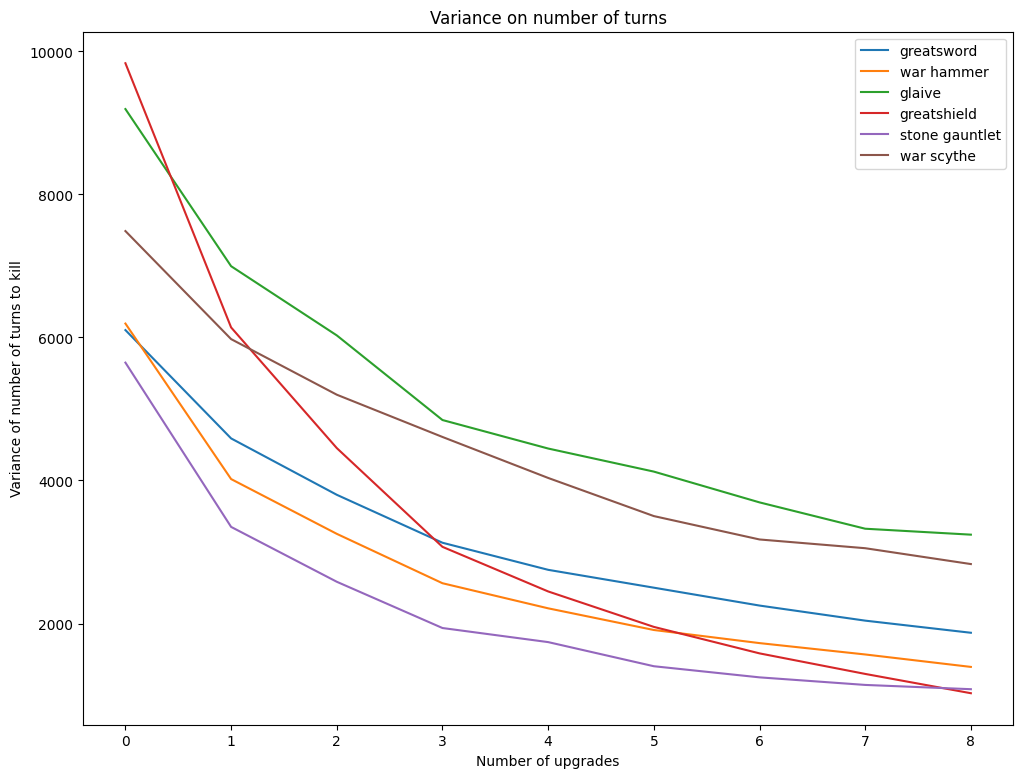

In [32]:
###########################Config variables###########################
enemy = Creatures.succubus
weapons = t5
hero_level = 18
strength = 18
armor = ArmorInstance(Armors.plate, 1, ArmorAugment.EVASION)
num_simulations = 5000
num_upgrades: tuple[int, int] = (0,8)

ignore_enemy_evasion = False
hero_first = True
#########################################################################

num_turns_data = []
damage_taken_data = []

for weapon in weapons:
    num_turns_results = []
    damage_taken_results = []
    hero = Hero(hero_level, strength, armor, weapon)
    for i in range(num_upgrades[0], num_upgrades[1] + 1):
        hero.weapon.upgrade = i
        turns_data_points, damage_taken_data_points = simulate_n_encounters2(hero, enemy, num_simulations, ignore_enemy_evasion, hero_first)
        num_turns_results.append(turns_data_points)
        damage_taken_results.append(damage_taken_data_points)
    num_turns_data.append(num_turns_results)
    damage_taken_data.append(damage_taken_results)

plt.figure(figsize=(12,9))
plt.title(f'Average number of turns vs {enemy.name}')
plt.xlabel("Number of upgrades")
plt.ylabel("Average number of turns to kill")
for i in range(len(weapons)):
    plt.plot(range(num_upgrades[0], num_upgrades[1] + 1), [np.average(x) for x in num_turns_data[i]], label=weapons[i].get_name_and_aug())
plt.xticks(range(num_upgrades[0], num_upgrades[1] + 1))
plt.legend()
plt.show()

plt.figure(figsize=(12,9))
plt.title('Variance on number of turns')
plt.xlabel("Number of upgrades")
plt.ylabel("Variance of number of turns to kill")
for i in range(len(weapons)):
    plt.plot(range(num_upgrades[0], num_upgrades[1] + 1), [np.var(x) for x in num_turns_data[i]], label=weapons[i].get_name_and_aug())
plt.xticks(range(num_upgrades[0], num_upgrades[1] + 1))
plt.legend()
plt.show()

plt.figure(figsize=(12,9))
plt.title(f'Average damage taken vs {enemy.name} with {armor.get_full_name()}')
plt.xlabel("Number of upgrades")
plt.ylabel("Average damage taken")
for i in range(len(weapons)):
    plt.plot(range(num_upgrades[0], num_upgrades[1] + 1), [np.average(x) for x in damage_taken_data[i]], label=weapons[i].get_name_and_aug())
plt.xticks(range(num_upgrades[0], num_upgrades[1] + 1))
plt.legend()
plt.show()

plt.figure(figsize=(12,9))
plt.title('Variance on number of turns')
plt.xlabel("Number of upgrades")
plt.ylabel("Variance of number of turns to kill")
for i in range(len(weapons)):
    plt.plot(range(num_upgrades[0], num_upgrades[1] + 1), [np.var(x) for x in damage_taken_data[i]], label=weapons[i].get_name_and_aug())
plt.xticks(range(num_upgrades[0], num_upgrades[1] + 1))
plt.legend()
plt.show()


### Upgrade priority

In [16]:
###########################Config variables###########################
enemy = Creatures.bat
hero_level = 13
strength = 15
weapon = WeaponInstance(Weapons.flail, 1)
armor = ArmorInstance(Armors.scale, 1, ArmorAugment.NONE)
num_simulations = 1000

ignore_enemy_evasion = False
hero_first = True
omit_last_hit = False
#########################################################################

hero = Hero(hero_level, strength, armor, weapon)

print(f'Enemy: {enemy.name}')
print(f'Current gear: {hero.weapon.get_full_name()} and {hero.armor.get_full_name()}')

num_turns_data, damage_taken_data = simulate_n_encounters2(hero, enemy, num_simulations, ignore_enemy_evasion, hero_first)
avg_damage_taken = np.average(damage_taken_data)
var_damage_taken = np.var(damage_taken_data)

print(f'Current gear average damage taken: {avg_damage_taken}')
print(f'Current gear variance damage taken: {var_damage_taken}')

hero.armor.upgrade += 1
up_armor_num_turns_data, up_armor_damage_taken_data = simulate_n_encounters2(hero, enemy, num_simulations, ignore_enemy_evasion, hero_first)
up_armor_avg_damage_taken = np.average(up_armor_damage_taken_data)
up_armor_var_damage_taken = np.var(up_armor_damage_taken_data)

print(f'Upgrade armor average damage taken: {up_armor_avg_damage_taken}')
print(f'Upgrade armor variance damage taken: {up_armor_var_damage_taken}')

hero.armor.upgrade -= 1
hero.weapon.upgrade += 1
up_weapon_num_turns_data, up_weapon_damage_taken_data = simulate_n_encounters2(hero, enemy, num_simulations, ignore_enemy_evasion, hero_first)
up_weapon_avg_damage_taken = np.average(up_weapon_damage_taken_data)
up_weapon_var_damage_taken = np.var(up_weapon_damage_taken_data)

print(f'Upgrade weapon average damage taken: {up_weapon_avg_damage_taken}')
print(f'Upgrade weapon variance damage taken: {up_weapon_var_damage_taken}')

improvement = calc_percent_change(up_weapon_avg_damage_taken, up_armor_avg_damage_taken) if up_weapon_avg_damage_taken < up_armor_avg_damage_taken else calc_percent_change(up_armor_avg_damage_taken, up_weapon_avg_damage_taken)

print(f'Upgrading {"weapon" if up_weapon_avg_damage_taken < up_armor_avg_damage_taken else "armor"} is better by {improvement}%')


Enemy: vampire bat
Current gear: +1 flail and +1 scale armor
Current gear average damage taken: 10.023
Current gear variance damage taken: 110.596471
Upgrade armor average damage taken: 8.433
Upgrade armor variance damage taken: 92.543511
Upgrade weapon average damage taken: 7.333
Upgrade weapon variance damage taken: 94.664111
Upgrading weapon is better by 15.000681849174956%


### Equipment set general comparison

In [ ]:
###########################Config variables###########################
enemy = Creatures.crab
hero_level = 3
strength = 11

###########################Equipment set 1###########################
weapon1 = WeaponInstance(Weapons.worn_shortsword, 1)
armor1 = ArmorInstance(Armors.cloth, 0, ArmorAugment.NONE)
######################################################################

###########################Equipment set 2############################
weapon2 = WeaponInstance(Weapons.shortsword, 0)
armor2 = ArmorInstance(Armors.leather, 1, ArmorAugment.NONE)
######################################################################

num_simulations = 10000

ignore_enemy_evasion = False
hero_first = True
omit_last_hit = False
#########################################################################

hero1 = Hero(hero_level, strength, armor1, weapon1)

num_turns_data1, damage_taken_data1 = simulate_n_encounters2(hero1, enemy, num_simulations, ignore_enemy_evasion, hero_first)
avg_damage_taken1 = np.average(damage_taken_data1)
var_damage_taken1 = np.var(damage_taken_data1)

print(f'Average damage taken for hero 1: {avg_damage_taken1}')

hero2 = Hero(hero_level, strength, armor2, weapon2)
num_turns_data2, damage_taken_data2 = simulate_n_encounters2(hero2, enemy, num_simulations, ignore_enemy_evasion, hero_first)
avg_damage_taken2 = np.average(damage_taken_data2)
var_damage_taken2 = np.var(damage_taken_data2)

print(f'Average damage taken for hero 2: {avg_damage_taken2}')

print(f'Percent change of hero 2 from hero 1: {calc_percent_change(avg_damage_taken1, avg_damage_taken2)}% or hero1 from hero {calc_percent_change(avg_damage_taken2, avg_damage_taken1)}%')

Average damage taken for hero 1: 6.0099
Average damage taken for hero 2: 7.8299
Percent change of hero 2 from hero 1: 30.28336577979667% or hero1 from hero 2-23.24423044994189%
